<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- K-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [123]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [125]:
# 데이터 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [126]:
# 기초통계정보 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [127]:
# Target 확인
target = 'medv'

# x, y 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 정규화**

> 정규화를 하면 값이, 0 과 1 사이  
> p.s target은 건드리지말기     
> x만 정규화 해주면 된다!

In [128]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


**3) 학습용, 평가용 데이터 분리**

In [129]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

# 4.성능 예측

- K분할 교차 검증 방법으로 모델 성능을 예측합니다.
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용합니다.
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정합니다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환합니다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있습니다.

**1) Linear Regression**

In [130]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 선언하기 
model = LinearRegression()

# 학습, 예측, 평가하기                                     # cv 의미 : 분할 갯수
cv_score = cross_val_score(model, x_train, y_train, cv=10) # cv=5 : 디폴트값

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.60111914 0.80415093 0.72032973 0.77772325 0.46198646 0.60611024
 0.6781901  0.75249854 0.78569936 0.79130233]
평균: 0.6979110071590404
표준편차: 0.10555254457260282


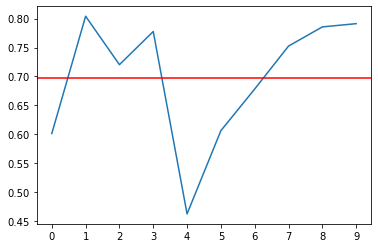

In [131]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10))
plt.show()

In [132]:
# 성능 정보 수집
score = []
my_cv = []

# cross_val_score 에서 cv값은 k-fold cross validation에서 몇 개의 분할을 사용할 것인지를 정해준다.
# 따라서, cv값이 적어도 2는 되어야 분할이 이루어지기 때문에 (=모든 데이터가 평가에 한 번, 학습에 k-1번 사용)
# range에서 2 부터 시작 한다.

for c in range(2, 21) :
    model = LinearRegression()
    cv_score = cross_val_score(model, x_train, y_train, cv=c)
    score.append(cv_score.mean())
    my_cv.append(c)
    
result = pd.DataFrame()
result['cv'] = my_cv
result['score'] = score
result.sort_values(by='score', ascending=False, inplace=True)
result

,cv,score
11,13,0.705999
7,9,0.701167
8,10,0.697911
1,3,0.697371
15,17,0.695722
13,15,0.695376
14,16,0.690036
10,12,0.687554
4,6,0.687376
5,7,0.686752


> cv=13일 때, 모델 성능이 가장 좋다

**2) KNN**

In [133]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# 선언하기 
model = KNeighborsRegressor(n_neighbors=5) # n_neighbors=5 : 디폴트 값

# 학습, 예측, 평가하기                                     # cv 의미 : 분할 갯수
cv_score = cross_val_score(model, x_train, y_train, cv=10) # cv=5 : 디폴트값

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.36715057 0.67693985 0.66740487 0.73962399 0.58467739 0.47964806
 0.68490351 0.55404666 0.77567643 0.83437924]
평균: 0.6364450566848314
표준편차: 0.13443584839930167


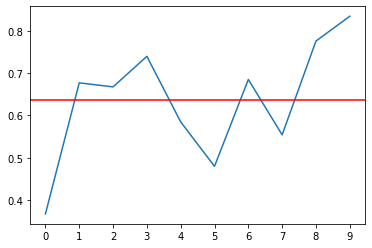

In [134]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10))
plt.show()

**3) Decision Tree**

In [135]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# 선언하기 
model = DecisionTreeRegressor(random_state=2022) # max_depth=None : 디폴트 값

# 학습, 예측, 평가하기                                     # cv 의미 : 분할 갯수
cv_score = cross_val_score(model, x_train, y_train, cv=10) # cv=5 : 디폴트값

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[0.82342492 0.74465874 0.82708527 0.63038326 0.65803077 0.24408602
 0.49464545 0.83895094 0.57627473 0.8683238 ]
평균: 0.6705863908588083
표준편차: 0.18555628263899532


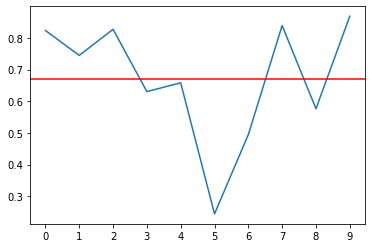

In [136]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10))
plt.show()

>  K-Fold Cross Validation(=K분할교차검증) 으로 한 결과,  
> Linear Regression 이 성능이 가장 좋게 나왔다. 그 중에서도 성능이 좋은 파라미터를 for문으로 찾아보자! (Linear Regression밑에 해봄!)

**4) 모델 만들기**

> 가장 성능이 좋았던 Linear Regression 로 모델을 만들어 보장

In [138]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 선언하기
model = LinearRegression()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 3.4962689389088695
R2-Score: 0.7430693569118817
